<a href="https://colab.research.google.com/github/makkimaki/python-bayes-intro/blob/main/%E3%81%99%E3%82%89%E3%81%99%E3%82%89%E3%83%99%E3%82%A4%E3%82%BA%E5%86%99%E7%B5%8C_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
!pip install japanize-matplotlib

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
# from IPython.display import display
import seaborn as sns
np.set_printoptions(precision=3, floatmode="fixed")
plt.rcParams["font.size"] = 8
plt.rcParams["figure.figsize"] = (3, 3)
plt.rcParams["axes.grid"] = True
pd.options.display.float_format = "[:.3f]".format
pd.set_option("display.max_columns", None)

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

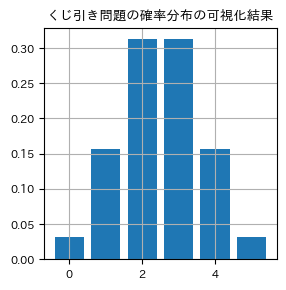

In [53]:
from scipy.special import comb


n = 5
x = range(n+1)
y = [comb(n, i)/(2**n) for i in x]
plt.bar(x, y)
plt.title("くじ引き問題の確率分布の可視化結果")

Text(0.5, 1.0, 'くじ引き問題の確率分布の可視化結果')

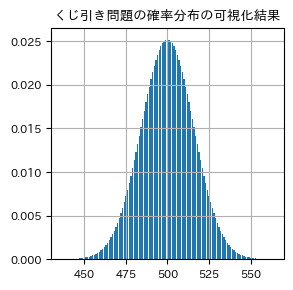

In [54]:
# prompt: くじ引き問題の確率分布の可視化プログラム(n=1000)
from scipy.special import comb

n = 1000
x = range(n+1)
y = [comb(n, i)/(2**n) for i in x]
plt.bar(x, y)
plt.xlim(430, 570)
plt.title("くじ引き問題の確率分布の可視化結果")


Text(0.5, 1.0, '確率分布と正規分布関数の重ね書き')

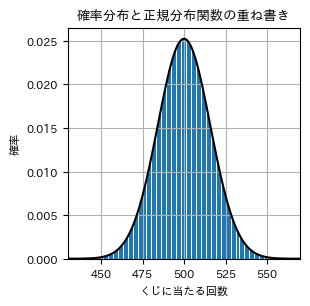

In [55]:
def norm(x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2/2) / (np.sqrt(2*np.pi)*sigma)

n = 1000
plt.xlim(430, 570)
x = np.arange(430, 571)

y1 = [comb(n, i)/(2**n) for i in x]
plt.bar(x, y1)

mu = n/2
sigma = np.sqrt(mu/2)
y2 = norm(x, mu, sigma)
plt.xlabel("くじに当たる回数")
plt.ylabel("確率")
plt.plot(x, y2, c="k")

plt.title("確率分布と正規分布関数の重ね書き")

In [56]:
import pymc as pm
import arviz as az

print(f"Running on PyMC v{pm.__version__}")
print(f"Running on ArviZ v{az.__version__}")

Running on PyMC v5.7.2
Running on ArviZ v0.15.1


In [57]:
model = pm.Model()

with model:
    # Binomial: 二項分布の確率分布
    # p: 二項分布の試行の成功確率
    # n: 二項分布における試行回数
    x = pm.Binomial("x", p=0.5, n=5)

In [58]:
# サンプリング
# sample_prior_predictive: 事前分布の予測値取得

with model:
    prior_samples = pm.sample_prior_predictive(random_seed=4)

In [59]:
prior_samples

Inference data with groups:
	> prior

In [60]:
x_samples = prior_samples["prior"]["x"].values
print("type: ", type(x_samples))
print("shape: ", x_samples.shape)
print("values: ", x_samples, "\n")

value_counts = pd.DataFrame(
    x_samples.reshape(-1)).value_counts().sort_index()

print(value_counts)

type:  <class 'numpy.ndarray'>
shape:  (1, 500)
values:  [[4 2 5 4 3 1 3 2 3 3 3 3 4 4 4 3 4 3 4 2 1 2 2 3 0 1 3 4 3 4 3 3 3 1 4 2
  1 4 2 4 3 3 3 2 3 1 3 2 2 3 5 3 4 0 3 2 1 2 0 2 4 2 2 4 5 3 3 3 0 4 3 1
  4 2 1 1 2 1 2 3 2 2 1 2 0 2 3 1 4 3 2 1 0 3 3 1 2 2 4 1 4 3 3 4 3 1 1 2
  2 3 3 2 4 2 2 3 1 2 3 0 3 1 3 2 2 4 2 3 5 1 4 4 1 3 4 2 3 2 2 4 3 2 1 4
  5 1 4 3 3 1 2 2 4 3 1 2 2 2 2 3 2 3 2 2 4 2 2 2 2 0 1 2 1 3 3 2 3 5 1 2
  4 2 4 3 2 5 0 2 3 4 3 2 3 1 3 3 3 3 4 4 3 3 2 5 2 2 3 2 2 3 2 4 2 3 3 5
  3 2 4 3 4 2 1 1 3 2 3 1 3 2 0 2 2 0 3 2 2 1 1 4 2 2 1 1 3 0 5 0 2 1 1 2
  3 2 3 3 1 1 2 2 3 5 3 1 0 2 3 2 3 1 3 1 2 1 1 4 3 1 4 2 2 3 3 2 3 3 2 4
  2 1 1 3 3 2 2 4 3 1 4 2 5 2 4 3 1 1 1 3 2 3 4 2 2 4 1 3 3 1 1 3 3 1 2 3
  1 3 1 2 1 3 0 3 3 3 4 3 2 3 4 0 2 3 3 2 2 2 4 2 1 3 2 2 2 2 2 3 2 3 3 3
  2 3 1 2 2 2 3 3 0 3 1 2 2 2 3 3 2 3 4 3 2 3 2 4 3 4 2 2 4 2 3 3 3 2 3 4
  4 3 2 1 1 2 4 5 3 4 3 2 1 3 2 3 4 3 1 2 4 3 3 2 3 1 3 3 3 4 2 4 3 3 1 2
  2 1 2 3 5 0 3 1 2 2 1 2 1 3 2 4 4 3 1 4 2 3 2 2 5 4 3

In [61]:
summary = az.summary(prior_samples, kind="stats")
display(summary)

,mean,sd,hdi_3%,hdi_97%
x,[:.3f],[:.3f],[:.3f],[:.3f]


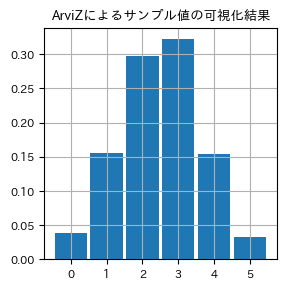

In [62]:
ax = az.plot_dist(x_samples)
ax.set_title('ArviZによるサンプル値の可視化結果');

## 代表的な・よく使われる確率分布

In [63]:
# ベルヌーイ分布

p = 0.5

model1 = pm.Model()

with model1:
    x = pm.Bernoulli("x", p=p)
    prior_samples1 = pm.sample_prior_predictive(random_seed=42)

x_samples1 = prior_samples1["prior"]["x"].values
print(x_samples1)

[[1 1 1 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1
  0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0
  0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 1
  1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
  1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1
  0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1
  1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 1 1
  0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 1
  1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0
  1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0
  1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1
  0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0
  1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 1
  0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 

In [64]:
summary1 = az.summary(prior_samples1, kind="stats")
display(summary1)

,mean,sd,hdi_3%,hdi_97%
x,[:.3f],[:.3f],[:.3f],[:.3f]


Text(0.5, 1.0, 'ベルヌーイ分布 p=0.5')

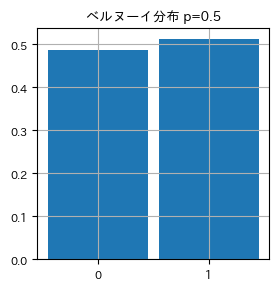

In [65]:
assert type(x_samples1) == np.ndarray
ax = az.plot_dist(x_samples1)
ax.set_title(f"ベルヌーイ分布 p={p}")

In [66]:
# 二項分布

p = 0.5
n = 7

model2 = pm.Model()
with model2:
    x = pm.Binomial("x", p=p, n=n)
    prior_samples2 = pm.sample_prior_predictive(random_seed=43)

x_samples2 = prior_samples2["prior"]["x"].values
print(x_samples2)

[[4 6 4 2 4 5 3 2 3 4 3 2 3 3 4 4 4 1 4 6 6 5 3 3 2 4 4 4 3 4 4 4 4 2 0 5
  4 3 2 2 2 4 3 4 2 3 3 6 1 2 2 2 2 4 5 4 4 5 3 3 3 4 6 2 3 3 1 3 5 2 5 3
  5 4 4 5 4 5 3 4 5 4 4 3 2 5 3 3 2 5 6 2 3 2 6 5 3 3 6 2 2 3 2 3 7 4 4 4
  3 4 3 2 5 6 3 3 3 3 1 3 4 2 7 6 3 3 3 1 2 4 2 5 2 3 2 4 2 2 2 5 6 3 6 2
  4 3 4 3 3 3 5 3 4 2 2 4 5 2 5 3 2 2 4 0 3 3 4 1 2 1 3 1 3 3 3 5 4 3 4 5
  2 0 1 3 3 2 1 4 5 3 4 3 2 2 4 3 4 5 4 5 3 2 4 5 4 3 3 3 5 3 2 4 4 5 5 3
  4 4 4 4 2 4 4 5 4 2 3 4 4 4 2 4 3 5 5 3 5 2 3 4 5 1 2 3 1 5 1 3 1 3 3 2
  5 3 4 3 2 4 2 4 3 2 5 3 4 6 4 4 4 4 5 5 3 5 4 2 5 5 2 6 2 5 2 2 4 3 3 1
  6 6 3 4 3 3 3 4 2 3 4 2 2 5 2 3 3 4 4 5 2 5 2 3 4 2 3 3 3 3 2 3 4 3 5 4
  5 4 3 6 6 4 6 5 4 5 5 4 3 5 4 4 4 3 6 5 2 4 4 2 3 5 1 3 3 2 3 5 1 2 3 4
  3 3 4 5 4 3 2 4 1 0 4 3 5 2 4 0 3 5 5 6 5 6 2 5 2 1 6 2 3 4 5 3 3 0 4 3
  5 2 5 3 4 2 2 1 4 4 5 1 3 3 4 4 1 4 1 4 2 3 5 2 6 5 3 6 4 3 2 3 4 6 2 4
  2 5 5 1 4 4 2 4 6 3 3 4 3 2 4 4 5 4 3 2 4 3 2 5 3 4 3 4 4 4 3 6 4 4 2 5
  3 3 3 6 3 4 5 4 2 5 5 5 4 1 4 3 4 4 

Shape validation failed: input_shape: (1, 500), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],NaN


Text(0.5, 1.0, '二項分布 p=0.5 n=7')

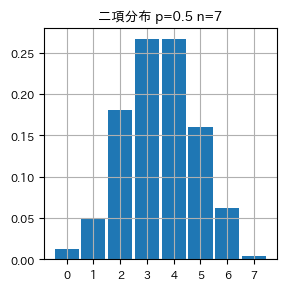

In [67]:
summary2 = az.summary(prior_samples2)
display(summary2)

ax = az.plot_dist(x_samples2)
ax.set_title(f"二項分布 p={p} n={n}")

[[ 0.418  0.606  0.029 -1.084  1.464  0.291 -1.331 -0.035  0.280  0.107
  -1.921  1.579  1.006  0.451 -0.593  0.094  1.852 -0.256 -0.283  0.416
  -1.089 -1.967  0.887 -1.328 -0.132 -0.362  0.782  0.283 -1.006  0.019
  -1.243  2.603  0.151 -0.516 -0.220  0.402  1.361  0.743  0.937  0.175
   1.525  0.098 -1.165  0.524 -1.066 -0.311  0.556 -0.100 -0.258 -1.590
  -1.815  0.536  1.271 -0.554  1.724 -0.312  0.063  1.382  0.585 -0.510
   0.251  0.406  0.866 -0.534 -0.039  1.143 -0.464  2.267 -0.529  0.325
  -0.154 -0.820 -1.203  0.095 -1.362  0.277  0.307 -1.404 -1.539  1.597
   1.268 -0.744 -1.379 -0.373  0.225 -0.797 -0.190  0.405 -1.567  1.622
  -0.559  1.285 -0.649  0.642  2.170 -0.549  0.032 -0.744  1.306  0.870]]


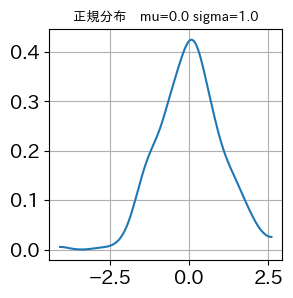

In [68]:
# 正規分布
mu = 0.0
sigma = 1.0

model4 = pm.Model()
with model4:
    # pm.Normal: 正規分布
    # mu:平均
    # sigma:標準偏差
    x = pm.Normal('x', mu=mu, sigma=sigma)
    # サンプリング
    prior_samples4 = pm.sample_prior_predictive(random_seed=42)

# サンプル値抽出
x_samples4 = prior_samples4['prior']['x'].values
# 桁数が多いので先頭100個だけに限定
print(x_samples4[:,:100])

# サンプリング結果の可視化
ax = az.plot_dist(x_samples4)
ax.set_title(f'正規分布　mu={mu} sigma={sigma}');

[-3.000 -2.500 -2.000 -1.500 -1.000 -0.500  0.000  0.500  1.000  1.500
  2.000  2.500  3.000]


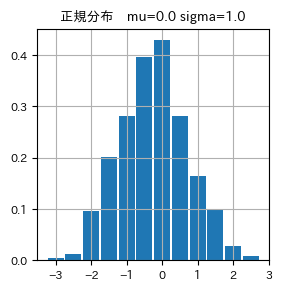

In [69]:
bins = np.arange(-3,3.5,0.5)
print(bins)
ax = az.plot_dist(x_samples4, kind='hist',
    hist_kwargs={'bins':bins}
                  )
plt.xticks(np.arange(-3,4,1))
ax.set_title(f'正規分布　mu={mu} sigma={sigma}');


In [70]:
# 一様分布
lower = 1.0
upper = 2.0

model6 = pm.Model()

with model6:
    x = pm.Uniform("x", lower=lower, upper=upper)
    prior_samples6 = pm.sample_prior_predictive(random_seed=42)

x_samples6 = prior_samples6["prior"]["x"].values
print(x_samples)
print(x_samples[:,:10])

[[4 2 5 4 3 1 3 2 3 3 3 3 4 4 4 3 4 3 4 2 1 2 2 3 0 1 3 4 3 4 3 3 3 1 4 2
  1 4 2 4 3 3 3 2 3 1 3 2 2 3 5 3 4 0 3 2 1 2 0 2 4 2 2 4 5 3 3 3 0 4 3 1
  4 2 1 1 2 1 2 3 2 2 1 2 0 2 3 1 4 3 2 1 0 3 3 1 2 2 4 1 4 3 3 4 3 1 1 2
  2 3 3 2 4 2 2 3 1 2 3 0 3 1 3 2 2 4 2 3 5 1 4 4 1 3 4 2 3 2 2 4 3 2 1 4
  5 1 4 3 3 1 2 2 4 3 1 2 2 2 2 3 2 3 2 2 4 2 2 2 2 0 1 2 1 3 3 2 3 5 1 2
  4 2 4 3 2 5 0 2 3 4 3 2 3 1 3 3 3 3 4 4 3 3 2 5 2 2 3 2 2 3 2 4 2 3 3 5
  3 2 4 3 4 2 1 1 3 2 3 1 3 2 0 2 2 0 3 2 2 1 1 4 2 2 1 1 3 0 5 0 2 1 1 2
  3 2 3 3 1 1 2 2 3 5 3 1 0 2 3 2 3 1 3 1 2 1 1 4 3 1 4 2 2 3 3 2 3 3 2 4
  2 1 1 3 3 2 2 4 3 1 4 2 5 2 4 3 1 1 1 3 2 3 4 2 2 4 1 3 3 1 1 3 3 1 2 3
  1 3 1 2 1 3 0 3 3 3 4 3 2 3 4 0 2 3 3 2 2 2 4 2 1 3 2 2 2 2 2 3 2 3 3 3
  2 3 1 2 2 2 3 3 0 3 1 2 2 2 3 3 2 3 4 3 2 3 2 4 3 4 2 2 4 2 3 3 3 2 3 4
  4 3 2 1 1 2 4 5 3 4 3 2 1 3 2 3 4 3 1 2 4 3 3 2 3 1 3 3 3 4 2 4 3 3 1 2
  2 1 2 3 5 0 3 1 2 2 1 2 1 3 2 4 4 3 1 4 2 3 2 2 5 4 3 1 2 2 3 1 0 4 3 3
  3 3 4 5 2 2 4 4 4 3 1 4 3 3 4 3 3 4 

Text(0.5, 1.0, '一様分布 lower=1.0, upper=2.0')

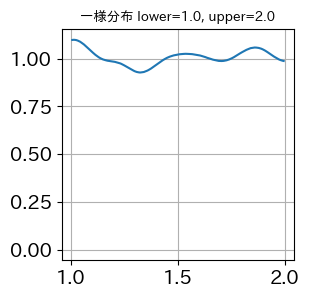

In [71]:
ax = az.plot_dist(x_samples6)
ax.set_title(f"一様分布 {lower=}, {upper=}")

Text(0.5, 1.0, '一様分布 upper=2.0, lower=1.0')

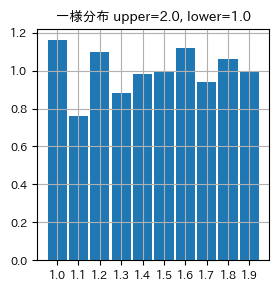

In [72]:
bins = np.arange(lower, upper+0.1, 0.1)
ax = az.plot_dist(x_samples6, kind="hist",
                  hist_kwargs={"bins": bins})
ax.set_title(f"一様分布 {upper=}, {lower=}")

Text(0, 0.5, '尤度')

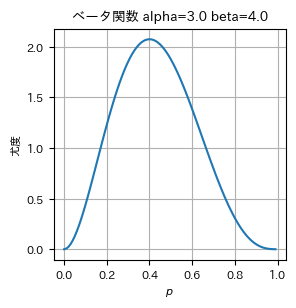

In [73]:
from math import gamma

alpha = 2.0 + 1.0
beta  = 3.0 + 1.0

def Beta(p, alpha, beta):
    C = gamma(alpha+beta-1) / (gamma(alpha-1)*gamma(beta-1))
    return C * p ** (alpha-1) * (1-p) ** (beta-1)

p = np.arange(0.0, 1.0, 0.01)

plt.plot(p, Beta(p=p, alpha=alpha, beta=beta))
plt.title(f"ベータ関数 {alpha=} {beta=}")
plt.xlabel(r"$p$")
plt.ylabel("尤度")

# ↓これを見ると、p=0.4が最も確からしい確率値であることを示唆している

[[0.478 0.778 0.745 0.639 0.689 0.182 0.314 0.431 0.472 0.491 0.764 0.209
  0.659 0.398 0.361 0.357 0.478 0.359 0.413 0.690 0.768 0.479 0.237 0.154
  0.286 0.583 0.231 0.492 0.248 0.549 0.377 0.435 0.635 0.457 0.690 0.563
  0.237 0.724 0.540 0.141 0.489 0.594 0.480 0.218 0.316 0.736 0.246 0.087
  0.447 0.532 0.362 0.203 0.189 0.300 0.219 0.576 0.309 0.381 0.670 0.196
  0.284 0.351 0.386 0.691 0.549 0.536 0.440 0.412 0.501 0.808 0.528 0.360
  0.485 0.374 0.588 0.266 0.662 0.469 0.620 0.299 0.840 0.284 0.672 0.734
  0.324 0.326 0.516 0.221 0.721 0.675 0.265 0.177 0.445 0.313 0.302 0.199
  0.483 0.575 0.528 0.389]]


Text(0.5, 1.0, 'ベータ分布 alpha=3.0, beta=4.0')

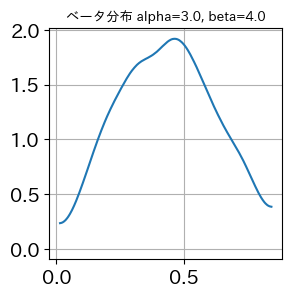

In [74]:
alpha = 2.0 + 1.0
beta = 3.0 + 1.0

model8 = pm.Model()
with model8:
    p = pm.Beta("p", alpha=alpha, beta=beta)
    prior_samples8 = pm.sample_prior_predictive(random_seed=42)

p_samples8 = prior_samples8["prior"]["p"].values
print(p_samples8[:,:100])

ax = az.plot_dist(p_samples8)
ax.set_title(f"ベータ分布 {alpha=}, {beta=}")

Text(0.5, 1.0, 'ベータ分布 alpha=3.0, beta=4.0')

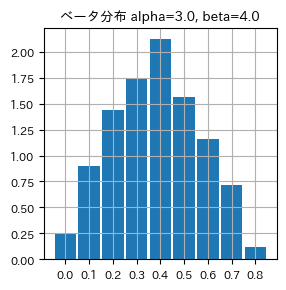

In [75]:
bins = np.arange(0, 1.0, 0.1)
ax = az.plot_dist(p_samples8, kind="hist",
                  hist_kwargs={"bins": bins}
                  )
ax.set_title(f"ベータ分布 {alpha=}, {beta=}")

## 最尤推定サンプル
くじ引きの例で、最尤推定するとは？

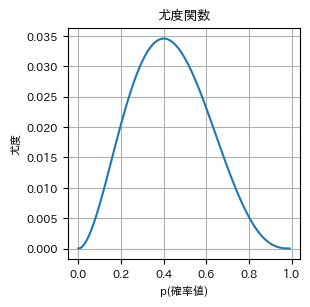

In [76]:
def lh(p):
    return p**2 * (1-p)**3

p = np.arange(0.0, 1.0, 0.01)

plt.plot(p, lh(p))
plt.xlabel("p(確率値)")
plt.ylabel("尤度")
plt.title(f"尤度関数");

In [77]:
# これを勾配降下法でとくには
import torch

def log_lh(p):
    return (2*torch.log(p)) + (3*torch.log(1-p))

num_epochs = 40
lr = 0.01

# パラメータ初期値
p = torch.tensor(0.1, dtype=torch.float32, requires_grad=True)

logs = np.zeros((0,3))
for epoch in range(num_epochs):
    loss = -log_lh(p)
    loss.backward()
    with torch.no_grad():
        p -= lr * p.grad
        p.grad.zero_() #勾配の初期化
    log = np.array([epoch, p.item(), loss.item()]).reshape(1, -1)
    logs = np.vstack([logs, log])


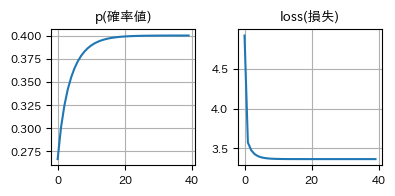

In [78]:
plt.rcParams["figure.figsize"] = (4, 2)
fig, axes = plt.subplots(1, 2)
axes[0].plot(logs[:,0], logs[:,1])
axes[0].set_title("p(確率値)")
axes[1].plot(logs[:,0], logs[:,2])
axes[1].set_title("loss(損失)")
plt.tight_layout()
plt.show()

## ベイズ推論（確率モデル定義）

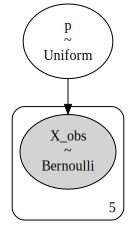

In [79]:
X = np.array([1, 0, 0, 1, 0])

model1 = pm.Model()

with model1:
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    X_obs = pm.Bernoulli("X_obs", p=p, observed=X)

g = pm.model_to_graphviz(model1)
display(g)

In [80]:
with model1:
    idata1_1 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )

In [81]:
with model1:
    idata1_2 = pm.sample(random_seed=43)

## ベイズ推論（結果分析）


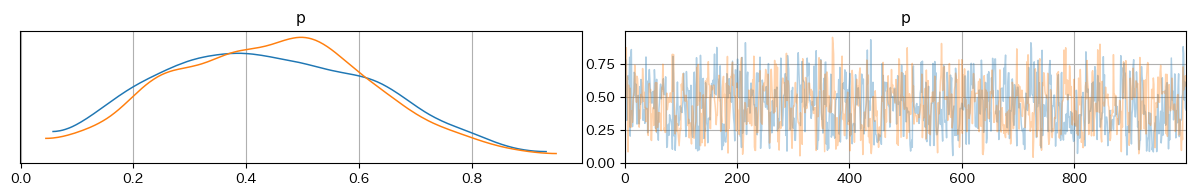

In [82]:
az.plot_trace(idata1_2, compact=False)
plt.tight_layout()

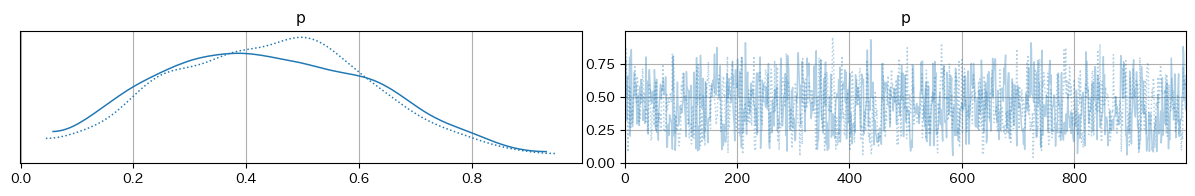

In [83]:
az.plot_trace(idata1_2, compact=True)
plt.tight_layout()

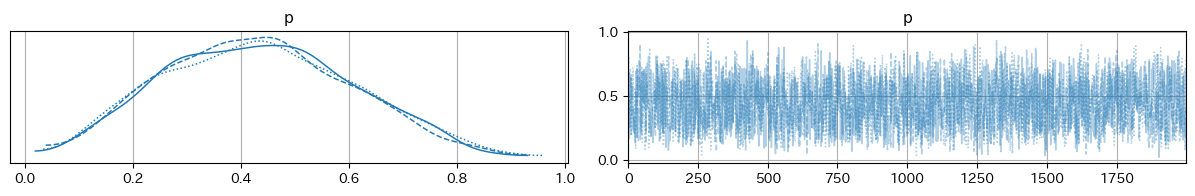

In [84]:
az.plot_trace(idata1_1, compact=True)
plt.tight_layout()

Text(0.5, 1.0, 'ベイズ推論結果\u3000初期版')

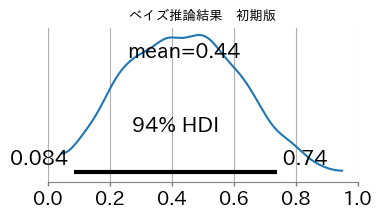

In [85]:
ax = az.plot_posterior(idata1_2)
ax.set_xlim(0, 1)
ax.set_title("ベイズ推論結果　初期版")

In [86]:
summary1_2 = az.summary(idata1_2)
display(summary1_2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f]


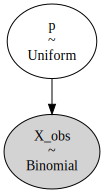

In [87]:
# X = np.array([1, 0, 0, 1, 0])

model2 = pm.Model()

with model2:
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    X_obs = pm.Binomial("X_obs", p=p, n=5, observed=2)

g = pm.model_to_graphviz(model2)
display(g)

↑これは2項分布のモデルだが、先ほどのベルヌーイ分布の場合と結果は同じになっている。

そもそも、「5回中2回あたり」が本質でありあたりの順序は関係ない。→二項分布でも同じように推論できる

Text(0.5, 1.0, '試行回数増やした n=50')

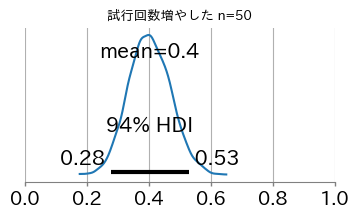

In [88]:
# 試行回数を増やす
model3 = pm.Model()

with model3:
    p = pm.Uniform("p", lower=0.0, upper=1.0)
    X_obs = pm.Binomial("X_obs", p=p, n=50, observed=20)

    idata3_1 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )
ax = az.plot_posterior(idata3_1)
ax.set_xlim(0, 1)
ax.set_title("試行回数増やした n=50")

## ベイズ推論（事前分布の変更）
これまで、0.0 <= p <= 1.0 （無制約）としていたものを何らかの条件を反映して、0.1 <= p <= 0.9　であるとする。

Text(0.5, 1.0, '事前分布修正 [0.1, 0.9]')

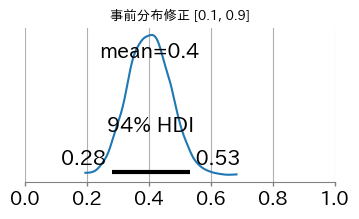

In [89]:
model4 = pm.Model()

with model4:
    p = pm.Uniform("p", lower=0.1, upper=0.9)
    X_obs = pm.Binomial("X_obs", p=p, n=50, observed=20)

    idata4_1 = pm.sample(
        chains=3,
        tune=2000,
        draws=2000,
        random_seed=42
    )
ax = az.plot_posterior(idata4_1)
ax.set_xlim(0, 1)
ax.set_title("事前分布修正 [0.1, 0.9]")

In [90]:
summary4 = az.summary(idata4_1)
display(summary4)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f],[:.3f]


## ベータ分布で直接確率分布を求める
今回の確率モデルが、ベータ分布になることが数学的に証明されている。


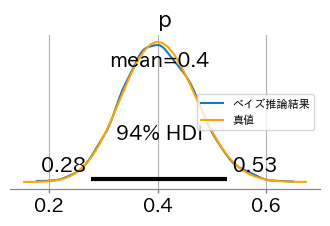

In [93]:
from scipy import stats

alpha = 20 + 1
beta = 30 + 1
true_beta = stats.beta(alpha, beta)

ax = az.plot_posterior(idata3_1)
ax.lines[0].set_label("ベイズ推論結果")

x = np.linspace(*ax.get_xlim())
ax.plot(x, true_beta.pdf(x), color="orange", label="真値")
ax.legend(loc="center right")